In [1]:
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline

In [2]:
total_messages_sent = 28281
total_time_ms = 323527
total_messages_sent_by_monitor = pd.DataFrame({"monitor": [i for i in range(1, 11)],
                                               "messages": [2743, 2871, 2721, 2837, 2881, 2875, 2864, 2868, 2849, 2772]})

df = pd.DataFrame()
for i in range(1, 11):
    tmp = pd.read_csv(f"./results-final/monitor_{i}_log.csv")
    tmp["monitor"] = i
    df = pd.concat([df, tmp], ignore_index=True)

In [3]:
df.head()

id     opened_at    ongoing_at     closed_at    total  monitor
0  ID1595187730240  1.595188e+12  1.595188e+12  1.595188e+12  10014.0        1
1  ID1595187730356  1.595188e+12  0.000000e+00  1.595188e+12  10006.0        1
2  ID1595187730356  1.595188e+12  0.000000e+00  1.595188e+12  10064.0        1
3  ID1595187730240  1.595188e+12  1.595188e+12  1.595188e+12  10281.0        1
4  ID1595187730414  1.595188e+12  1.595188e+12  1.595188e+12  10120.0        1

In [4]:
df1 = df.copy()
df1.ongoing_at = np.where(df1.ongoing_at > 0, df1.ongoing_at - df1.opened_at.min(), 0)
df1.closed_at = df1.closed_at - df1.opened_at.min()
df1.opened_at = df1.opened_at - df1.opened_at.min()
df1

id  opened_at  ongoing_at  closed_at    total  monitor
0      ID1595187730240        0.0     10012.0    10014.0  10014.0        1
1      ID1595187730356      116.0         0.0    10122.0  10006.0        1
2      ID1595187730356      116.0         0.0    10180.0  10064.0        1
3      ID1595187730240        0.0     10012.0    10281.0  10281.0        1
4      ID1595187730414      174.0     10280.0    10294.0  10120.0        1
...                ...        ...         ...        ...      ...      ...
27399  ID1595188042847   312607.0         0.0   322931.0  10324.0       10
27400  ID1595188043075   312835.0         0.0   323150.0  10315.0       10
27401  ID1595188041431   311191.0         0.0   323278.0  12087.0       10
27402  ID1595188041110   310870.0         0.0   323315.0  12445.0       10
27403  ID1595188043384   313144.0         0.0   323481.0  10337.0       10

[27404 rows x 6 columns]

In [5]:
df1.describe()

opened_at     ongoing_at      closed_at          total  \
count   27404.000000   27404.000000   27404.000000   27404.000000   
mean   155375.864472   35257.586958  167039.105678   11663.241206   
std     91139.680337   79462.558237   90351.752775    7151.593958   
min         0.000000       0.000000   10014.000000   10002.000000   
25%     77998.000000       0.000000   88867.000000   10331.000000   
50%    155899.500000       0.000000  167030.000000   10580.000000   
75%    233799.750000       0.000000  245280.000000   11067.000000   
max    313440.000000  323446.000000  323511.000000  259760.000000   

            monitor  
count  27404.000000  
mean       5.519596  
std        2.857925  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%        8.000000  
max       10.000000

In [6]:
df_by_monitor = df.groupby("monitor").agg({"id": ['count'], "total": ['sum', 'mean']}).reset_index()
df_by_monitor.columns = ['_'.join(col).rstrip('_') for col in df_by_monitor.columns.values]

In [7]:
df_by_monitor = df_by_monitor.merge(total_messages_sent_by_monitor, on='monitor')
# df_by_monitor[""]

In [8]:
df_by_monitor["messages_handled"] = df_by_monitor["id_count"] / df_by_monitor["messages"]
df_by_monitor

monitor  id_count   total_sum    total_mean  messages  messages_handled
0        1      2655  31321593.0  11797.210169      2743          0.967918
1        2      2783  33017373.0  11863.950054      2871          0.969349
2        3      2620  30620838.0  11687.342748      2721          0.962881
3        4      2754  31791946.0  11543.916485      2837          0.970744
4        5      2793  32882848.0  11773.307555      2881          0.969455
5        6      2778  32320771.0  11634.546796      2875          0.966261
6        7      2788  32370759.0  11610.745696      2864          0.973464
7        8      2778  31364378.0  11290.272858      2868          0.968619
8        9      2761  32189405.0  11658.603767      2849          0.969112
9       10      2694  31739551.0  11781.570527      2772          0.971861

In [9]:
df_by_monitor.groupby(lambda _ : True).agg({"messages_handled": ['mean', 'std']})

messages_handled          
                 mean       std
True         0.968966  0.002939

In [10]:
df1[(df1.closed_at - df1.opened_at) > 0.95 * (df1.closed_at - df1.opened_at).max()]

id  opened_at  ongoing_at  closed_at     total  monitor
18804  ID1595187761948    31708.0         0.0   281016.0  249308.0        7
27396  ID1595187793111    62871.0         0.0   322631.0  259760.0       10
27397  ID1595187794377    64137.0         0.0   322680.0  258543.0       10

In [11]:
df1[df1.total > 0.95 * df1.total.max()]

id  opened_at  ongoing_at  closed_at     total  monitor
18804  ID1595187761948    31708.0         0.0   281016.0  249308.0        7
27396  ID1595187793111    62871.0         0.0   322631.0  259760.0       10
27397  ID1595187794377    64137.0         0.0   322680.0  258543.0       10

In [12]:
df1[df1.opened_at > 0.9 * df1.opened_at.max()]

id  opened_at  ongoing_at  closed_at    total  monitor
2391   ID1595188012588   282348.0         0.0   292470.0  10122.0        1
2392   ID1595188012705   282465.0    292470.0   292860.0  10395.0        1
2393   ID1595188012385   282145.0    292150.0   292873.0  10728.0        1
2398   ID1595188012705   282465.0    292470.0   293112.0  10647.0        1
2399   ID1595188012588   282348.0         0.0   293133.0  10785.0        1
...                ...        ...         ...        ...      ...      ...
27399  ID1595188042847   312607.0         0.0   322931.0  10324.0       10
27400  ID1595188043075   312835.0         0.0   323150.0  10315.0       10
27401  ID1595188041431   311191.0         0.0   323278.0  12087.0       10
27402  ID1595188041110   310870.0         0.0   323315.0  12445.0       10
27403  ID1595188043384   313144.0         0.0   323481.0  10337.0       10

[2658 rows x 6 columns]

In [13]:
df1 = df1.sort_values(by="opened_at").reset_index(drop=True)
df1.iloc[100:120,:]

id  opened_at  ongoing_at  closed_at    total  monitor
100  ID1595187730576      337.0         0.0    18600.0  18263.0        6
101  ID1595187730576      337.0         0.0    10684.0  10347.0        6
102  ID1595187730599      359.0         0.0    11092.0  10733.0        8
103  ID1595187730610      370.0         0.0    19803.0  19433.0        1
104  ID1595187730610      370.0         0.0    17592.0  17222.0        1
105  ID1595187730610      370.0         0.0    28033.0  27663.0        1
106  ID1595187730622      382.0         0.0    10978.0  10596.0        4
107  ID1595187730622      382.0         0.0    11461.0  11079.0        4
108  ID1595187730622      382.0         0.0    10428.0  10046.0        4
109  ID1595187730632      392.0         0.0    10716.0  10324.0        5
110  ID1595187730643      403.0         0.0    10522.0  10119.0        7
111  ID1595187730643      403.0     11381.0    25355.0  24952.0        7
112  ID1595187730655      415.0         0.0    31110.0  30695.0        7
113  ID1595187730655      415.0         0.0    10842.0  10427.0        7
114  ID1595187730655      415.0         0.0    21545.0  21130.0        7
115  ID1595187730655      415.0         0.0    23326.0  22911.0        7
116  ID1595187730655      415.0         0.0    11369.0  10954.0        7
117  ID1595187730665      425.0         0.0    17995.0  17570.0        4
118  ID1595187730677      437.0         0.0    14291.0  13854.0        2
119  ID1595187730677      437.0         0.0    11509.0  11072.0        2

In [14]:
df1["opened_intervals"] = df1["opened_at"].diff().fillna(0)

In [15]:
df1.opened_intervals.nlargest(10)

27402    147.0
3608     128.0
3862     126.0
2196     119.0
5094     119.0
11513    113.0
21216    111.0
23667    108.0
3255     107.0
2323     103.0
Name: opened_intervals, dtype: float64

In [16]:
df1[df1.opened_intervals.isin(df1.opened_intervals.nlargest(10))]

id  opened_at  ongoing_at  closed_at    total  monitor  \
2196   ID1595187749462    19222.0         0.0    29225.0  10003.0        5   
2323   ID1595187751482    21242.0         0.0    36410.0  15168.0        5   
3255   ID1595187764082    33842.0     43845.0    44900.0  11058.0        7   
3608   ID1595187768881    38641.0         0.0    49996.0  11355.0        4   
3862   ID1595187772328    42088.0         0.0    53920.0  11832.0        1   
5094   ID1595187787901    57661.0         0.0    68104.0  10443.0        8   
11513  ID1595187861319   131079.0    141152.0   142147.0  11068.0        6   
21216  ID1595187972053   241813.0    251818.0   252274.0  10461.0        4   
23667  ID1595188000058   269818.0         0.0   280132.0  10314.0        2   
27402  ID1595188043590   313350.0    323356.0   323437.0  10087.0        5   

       opened_intervals  
2196              119.0  
2323              103.0  
3255              107.0  
3608              128.0  
3862              126.0  
5094              119.0  
11513             113.0  
21216             111.0  
23667             108.0  
27402             147.0

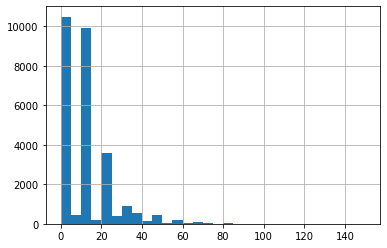

In [17]:
df1.opened_intervals.hist(bins=30, range=(0,150))

In [18]:
df1.opened_intervals.mean()

11.437746314406656

In [19]:
df1[df1.opened_intervals > 25].groupby("monitor")["opened_intervals"].mean()

monitor
1     41.061224
2     42.046154
3     41.275229
4     41.022989
5     40.815603
6     40.870370
7     40.413655
8     40.634241
9     40.485401
10    41.975904
Name: opened_intervals, dtype: float64